In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def createDfsDict(dirPath, years, prefix):
    trny = {}
    for year in years:
        filepath = f"{dirPath}/{prefix}{year}.csv"
        trny[year] = pd.read_csv(filepath)

    return trny

In [3]:
def calcStats(df):
    defAvg = np.mean(df["ADE"])
    defStd = np.std(df["ADE"])
    offAvg = np.mean(df["AOE"])
    offStd = np.std(df["AOE"])

    return defAvg, defStd, offAvg, offStd

In [4]:
def calcBounds(df, rnd=None):
    dAvg, dStd, oAvg, oStd = calcStats(df)
    if rnd is not None:
        if rnd == 1:
            xMin = dAvg - (2 * dStd)
            xMax = dAvg
            yMin = oAvg
            yMax = oAvg + (2 * oStd)
        if rnd in (2, 3):
            xMin = dAvg - (1.75 * dStd)
            xMax = dAvg + (0.25 * dStd)
            yMin = oAvg - (0.25 * oStd)
            yMax = oAvg + (1.75 * oStd)
        if rnd == 4:
            xMin = dAvg - (1.5 * dStd)
            xMax = dAvg + (0.5 * dStd)
            yMin = oAvg - (0.5 * oStd)
            yMax = oAvg + (1.5 * oStd)
        if rnd == 5:
            xMin = dAvg - (1.75 * dStd)
            xMax = dAvg + (0.25 * dStd)
            yMin = oAvg - (0.25 * oStd)
            yMax = oAvg + (1.75 * oStd)
        if rnd == 6:
            xMin = dAvg - dStd
            xMax = dAvg + dStd
            yMin = oAvg - (0.5 * oStd)
            yMax = oAvg + (1.5 * oStd)
    else:
        xMin = dAvg - dStd
        xMax = dAvg + dStd
        yMin = oAvg - oStd
        yMax = oAvg + oStd

    return xMin, xMax, yMin, yMax

In [52]:
def setPtColorProp(df, rnd):
    if df["finish"].isna().all() or len(df) == 0:
        colors = ["yellow"]
    else:
        colors = ["greenyellow" if x < (8 - rnd) else "darkgray" for x in df["finish"]]

    return colors

In [57]:
def setPtSizeProp(df, rnd):
    if df["finish"].isna().all() or len(df) == 0:
        size = [100]
    else:
        size = [100 if rnd == 6 else 20]

    return size

In [54]:
def renderPlot(df, rnd, rndTitle, ptLabels=False):
    dAvg, _, oAvg, _ = calcStats(df)
    xMinB, xMaxB, yMinB, yMaxB = calcBounds(df)
    xMinSc, xMaxSc, yMinSc, yMaxSc = calcBounds(df, rnd=rnd)

    _, ax = plt.subplots()

    ax.set_facecolor("slategray")
    ax.set_title(f"2014-2023 Offense/Defense Efficiencies ({rndTitle})")
    ax.set_xlabel("Adjusted Defensive Efficiency")
    ax.set_ylabel("Adjusted Offensive Efficiency")

    ax.axvline(x=(xMinSc), color="deepskyblue", linestyle="-.", linewidth=0.625)
    ax.axvline(x=(xMaxSc), color="deepskyblue", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMinSc), color="deepskyblue", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMaxSc), color="deepskyblue", linestyle="-.", linewidth=0.625)
    ax.fill_between(
        x=[xMinSc, xMaxSc],
        y1=yMinSc,
        y2=yMaxSc,
        color="deepskyblue",
        alpha=0.25,
    )

    ax.axvline(x=dAvg, color="white", linestyle="-", linewidth=0.5)
    ax.axhline(y=oAvg, color="white", linestyle="-", linewidth=0.5)
    ax.fill_between(
        x=[xMinB, xMaxB],
        y1=yMinB,
        y2=yMaxB,
        color="white",
        alpha=0.25,
        linewidth=0,
    )

    ax.scatter(
        df["ADE"],
        df["AOE"],
        c=setPtColorProp(df, rnd),
        s=setPtSizeProp(df, rnd),
    )

    if ptLabels:
        for _, pt in df.iterrows():
            ax.text(
                pt["ADE"],
                pt["AOE"],
                pt["seed"],
                fontsize=9,
                ha="center",
                va="center",
                c="darkslategray",
            )

        for _, pt in df.iterrows():
            ax.text(
                pt["ADE"] + 0.125,
                pt["AOE"] + 0.25,
                pt["team"][:5] if len(pt["team"]) > 5 else pt["team"],
                fontsize=7,
                ha="left",
                va="bottom",
                c="darkslategray",
            )

    return plt.show()

In [55]:
trnyKp = createDfsDict(
    dirPath="../data/TourneyTeams/KenpomStats",
    years=["14", "15", "16", "17", "18", "19", "21", "22", "23"],
    prefix="trnyKenpom",
)


for year, df in trnyKp.items():
    globals()[f"trny{year}"] = df


pastKpR1 = pd.concat(
    [trny14, trny15, trny16, trny17, trny18, trny19, trny21, trny22, trny23]
)

pastKpR2 = pd.concat(
    [
        trny14[trny14["finish"] <= 6],
        trny15[trny15["finish"] <= 6],
        trny16[trny16["finish"] <= 6],
        trny17[trny17["finish"] <= 6],
        trny18[trny18["finish"] <= 6],
        trny19[trny19["finish"] <= 6],
        trny21[trny21["finish"] <= 6],
        trny22[trny22["finish"] <= 6],
        trny23[trny23["finish"] <= 6],
    ]
)

pastKpR3 = pd.concat(
    [
        trny14[trny14["finish"] <= 5],
        trny15[trny15["finish"] <= 5],
        trny16[trny16["finish"] <= 5],
        trny17[trny17["finish"] <= 5],
        trny18[trny18["finish"] <= 5],
        trny19[trny19["finish"] <= 5],
        trny21[trny21["finish"] <= 5],
        trny22[trny22["finish"] <= 5],
        trny23[trny23["finish"] <= 5],
    ]
)

pastKpR4 = pd.concat(
    [
        trny14[trny14["finish"] <= 4],
        trny15[trny15["finish"] <= 4],
        trny16[trny16["finish"] <= 4],
        trny17[trny17["finish"] <= 4],
        trny18[trny18["finish"] <= 4],
        trny19[trny19["finish"] <= 4],
        trny21[trny21["finish"] <= 4],
        trny22[trny22["finish"] <= 4],
        trny23[trny23["finish"] <= 4],
    ]
)

pastKpR5 = pd.concat(
    [
        trny14[trny14["finish"] <= 3],
        trny15[trny15["finish"] <= 3],
        trny16[trny16["finish"] <= 3],
        trny17[trny17["finish"] <= 3],
        trny18[trny18["finish"] <= 3],
        trny19[trny19["finish"] <= 3],
        trny21[trny21["finish"] <= 3],
        trny22[trny22["finish"] <= 3],
        trny23[trny23["finish"] <= 3],
    ]
)

pastKpR6 = pd.concat(
    [
        trny14[trny14["finish"] <= 2],
        trny15[trny15["finish"] <= 2],
        trny16[trny16["finish"] <= 2],
        trny17[trny17["finish"] <= 2],
        trny18[trny18["finish"] <= 2],
        trny19[trny19["finish"] <= 2],
        trny21[trny21["finish"] <= 2],
        trny22[trny22["finish"] <= 2],
        trny23[trny23["finish"] <= 2],
    ]
)

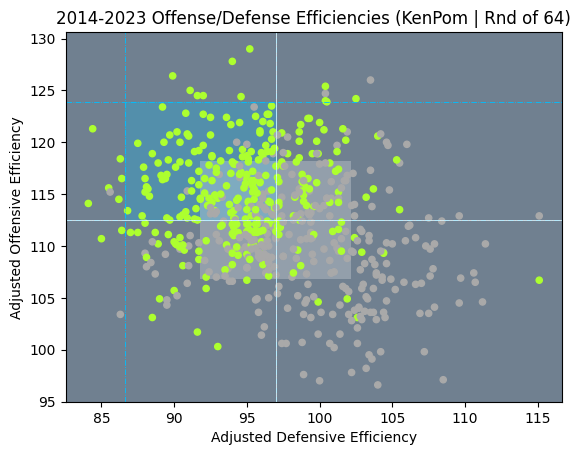

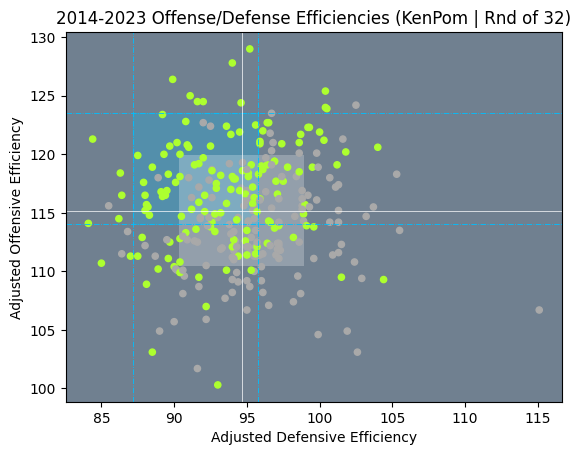

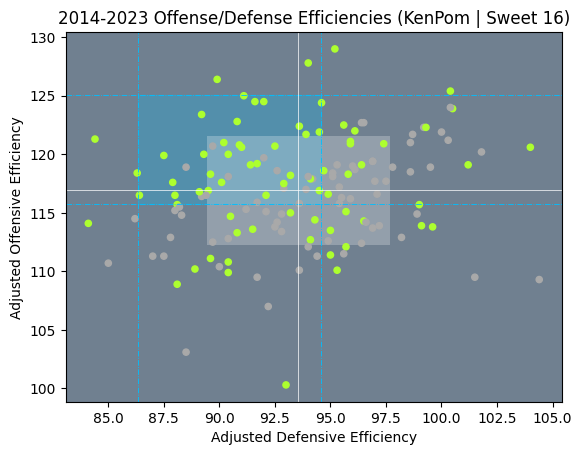

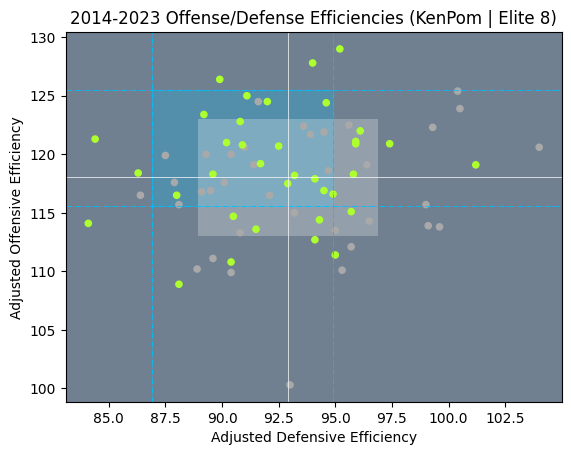

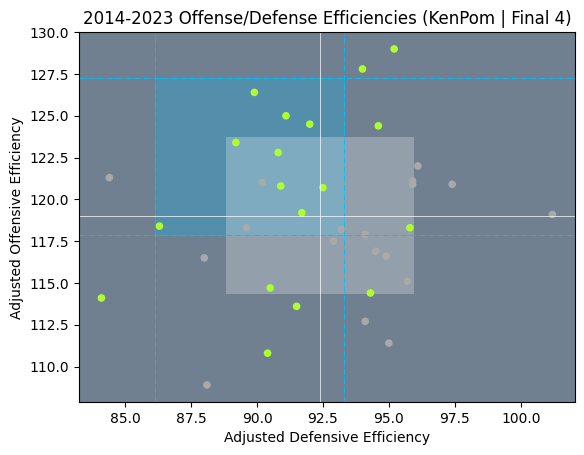

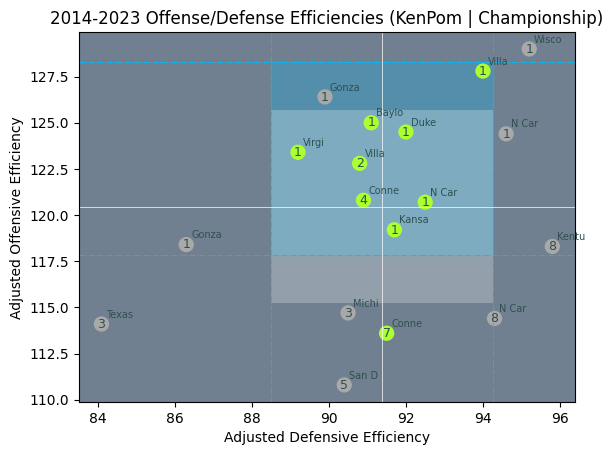

None

None

None

None

None

None

In [58]:
histKpRnd1 = renderPlot(df=pastKpR1, rnd=1, rndTitle="KenPom | Rnd of 64")
histKpRnd2 = renderPlot(df=pastKpR2, rnd=2, rndTitle="KenPom | Rnd of 32")
histKpRnd3 = renderPlot(df=pastKpR3, rnd=3, rndTitle="KenPom | Sweet 16")
histKpRnd4 = renderPlot(df=pastKpR4, rnd=4, rndTitle="KenPom | Elite 8")
histKpRnd5 = renderPlot(df=pastKpR5, rnd=5, rndTitle="KenPom | Final 4")
histKpRnd6 = renderPlot(df=pastKpR6, rnd=6, rndTitle="KenPom | Championship", ptLabels=True)

display(
    histKpRnd1, histKpRnd2, histKpRnd3, histKpRnd4, histKpRnd5, histKpRnd6
)

In [61]:
trnyKp24 = pd.read_csv("../data/TourneyTeams/KenpomStats/trnyKenpom24.csv")

trnyKp24East = trnyKp24[trnyKp24["hostReg"] == "East"]
trnyKp24West = trnyKp24[trnyKp24["hostReg"] == "West"]
trnyKp24South = trnyKp24[trnyKp24["hostReg"] == "South"]
trnyKp24Midwest = trnyKp24[trnyKp24["hostReg"] == "Midwest"]

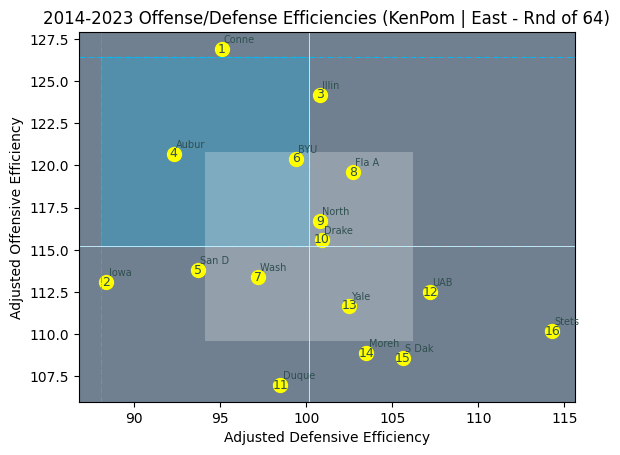

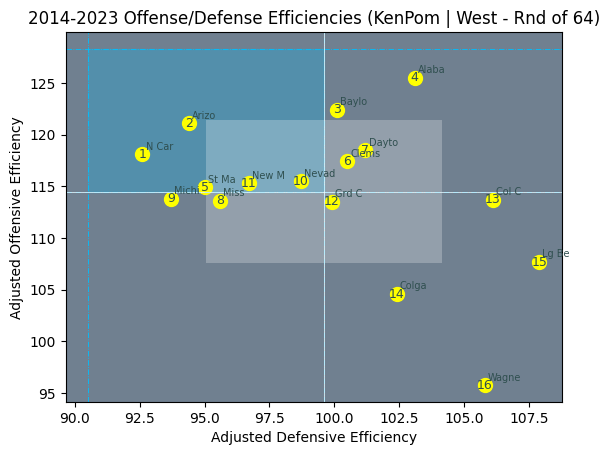

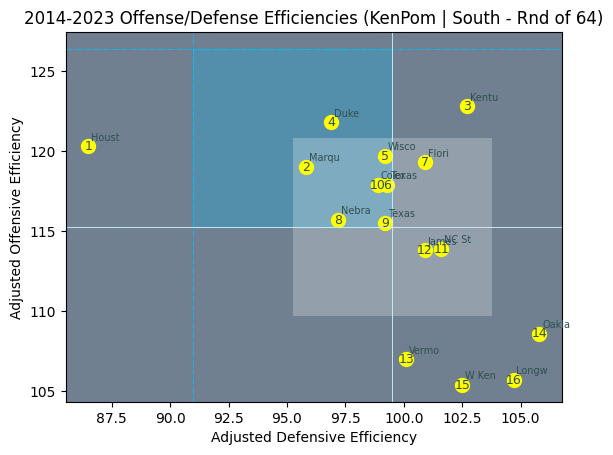

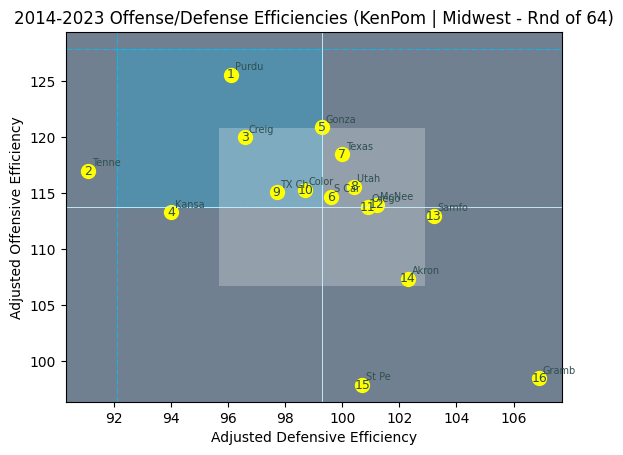

None

None

None

None

In [62]:
eastKpPlotRnd1 = renderPlot(df=trnyKp24East, rnd=1, rndTitle="KenPom | East - Rnd of 64", ptLabels=True)
westKpPlotRnd1 = renderPlot(df=trnyKp24West, rnd=1, rndTitle="KenPom | West - Rnd of 64", ptLabels=True)
southKpPlotRnd1 = renderPlot(df=trnyKp24South, rnd=1, rndTitle="KenPom | South - Rnd of 64", ptLabels=True)
midwestKpPlotRnd1 = renderPlot(df=trnyKp24Midwest, rnd=1, rndTitle="KenPom | Midwest - Rnd of 64", ptLabels=True)

display(eastKpPlotRnd1, westKpPlotRnd1, southKpPlotRnd1, midwestKpPlotRnd1)

In [63]:
# East: Connecticut, Iowa St, Illinois, Auburn, San Diego St, BYU, Drake, Northwestern
# West: N Carolina, Arizona, Baylor, Alabama, St Marys, New Mexico, Nevada, Michigan St
# South: Houston, Marquette, Kentucky, Duke, Wisconsins, Texas Tech, Colorado, Nebraska
# Midwest: Purdue, Tennessee, Creighton, Kansas, Gonzaga, S Carolina, Colorado St, TX Christian

rnd2Teams = ["Connecticut", "Iowa St", "Illinois", "Auburn", "San Diego St", "BYU", "Drake", "Northwestern", "N Carolina", "Arizona", "Baylor", "Alabama", "St Marys", "New Mexico", "Nevada", "Michigan St", "Houston", "Marquette", "Kentucky", "Duke", "Wisconsin", "Texas Tech", "Colorado", "Nebraska", "Purdue", "Tennessee", "Creighton", "Kansas", "Gonzaga", "S Carolina", "Colorado St", "TX Christian"]

trnyKp24Rnd2 = trnyKp24[trnyKp24["team"].isin(rnd2Teams)]
trnyKp24EastRnd2 = trnyKp24Rnd2[trnyKp24Rnd2["hostReg"] == "East"]
trnyKp24WestRnd2 = trnyKp24Rnd2[trnyKp24Rnd2["hostReg"] == "West"]
trnyKp24SouthRnd2 = trnyKp24Rnd2[trnyKp24Rnd2["hostReg"] == "South"]
trnyKp24MidwestRnd2 = trnyKp24Rnd2[trnyKp24Rnd2["hostReg"] == "Midwest"]

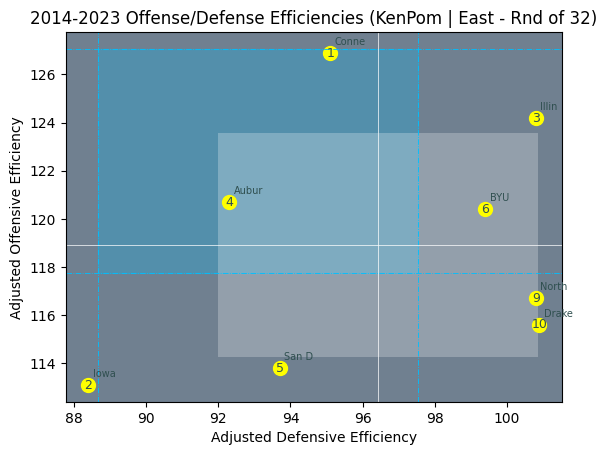

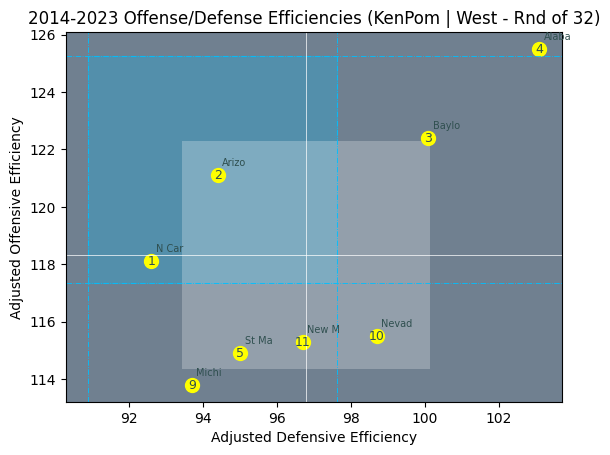

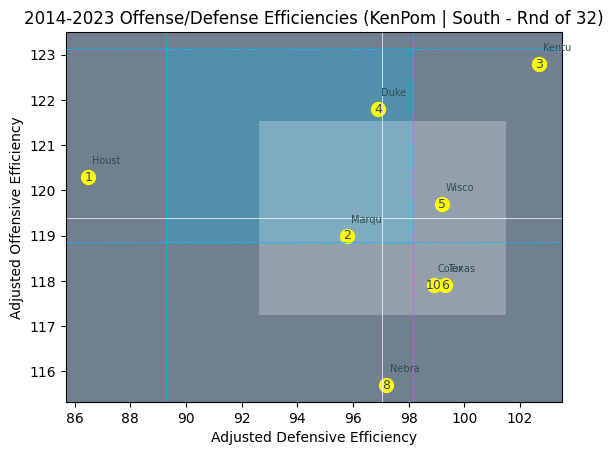

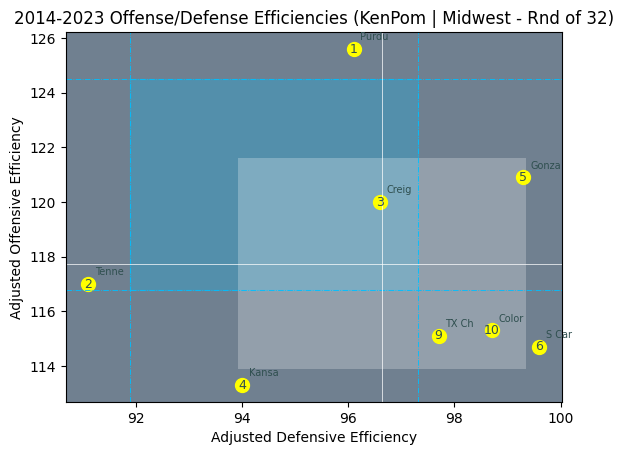

None

None

None

None

In [64]:
eastKpPlotRnd2 = renderPlot(df=trnyKp24EastRnd2, rnd=2, rndTitle="KenPom | East - Rnd of 32", ptLabels=True)
westKpPlotRnd2 = renderPlot(df=trnyKp24WestRnd2, rnd=2, rndTitle="KenPom | West - Rnd of 32", ptLabels=True)
southKpPlotRnd2 = renderPlot(df=trnyKp24SouthRnd2, rnd=2, rndTitle="KenPom | South - Rnd of 32", ptLabels=True)
midwestKpPlotRnd2 = renderPlot(df=trnyKp24MidwestRnd2, rnd=2, rndTitle="KenPom | Midwest - Rnd of 32", ptLabels=True)

display(eastKpPlotRnd2, westKpPlotRnd2, southKpPlotRnd2, midwestKpPlotRnd2)

In [65]:
# East: Connecticut, Auburn, BYU, Drake
# West: N Carolina, Arizona, St Marys, New Mexico
# South: Houston, Marquette, Duke, Texas Tech
# Midwest: Purdue, Tennessee, Creighton, Gonzaga

rnd3Teams = (
    "Connecticut",
    "Auburn",
    "BYU",
    "Drake",
    "N Carolina",
    "Arizona",
    "St Marys",
    "New Mexico",
    "Houston",
    "Marquette",
    "Duke",
    "Texas Tech",
    "Purdue",
    "Tennessee",
    "Creighton",
    "Gonzaga",
)

trnyKp24Rnd3 = trnyKp24[trnyKp24["team"].isin(rnd3Teams)]
trnyKp24EastRnd3 = trnyKp24Rnd3[trnyKp24Rnd3["hostReg"] == "East"]
trnyKp24WestRnd3 = trnyKp24Rnd3[trnyKp24Rnd3["hostReg"] == "West"]
trnyKp24SouthRnd3 = trnyKp24Rnd3[trnyKp24Rnd3["hostReg"] == "South"]
trnyKp24MidwestRnd3 = trnyKp24Rnd3[trnyKp24Rnd3["hostReg"] == "Midwest"]

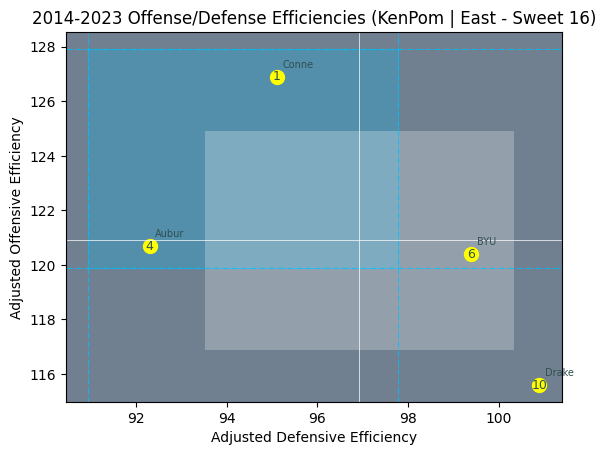

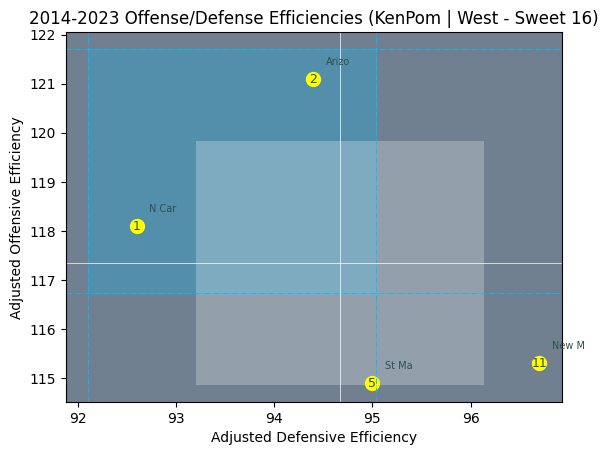

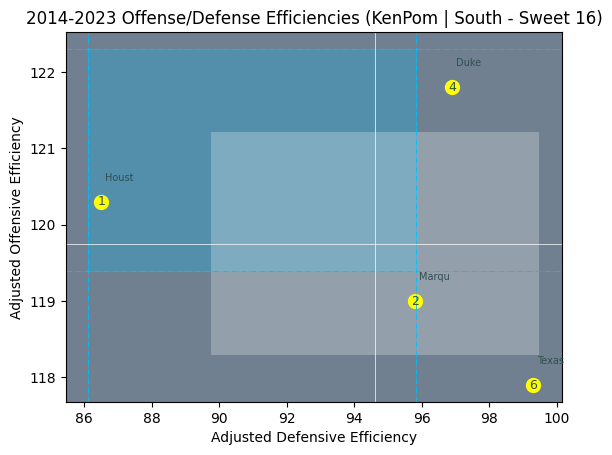

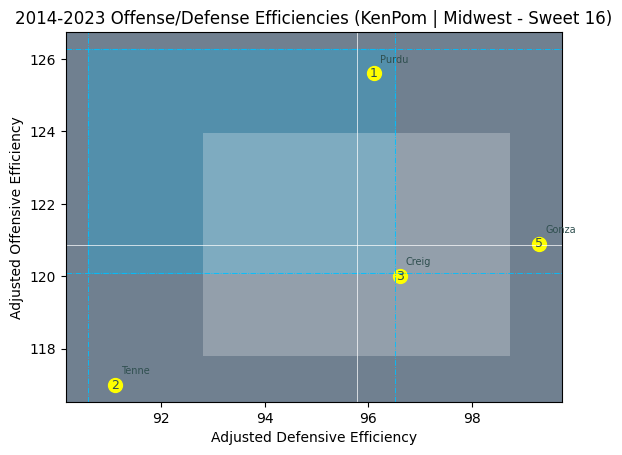

None

None

None

None

In [66]:
eastKpPlotRnd3 = renderPlot(df=trnyKp24EastRnd3, rnd=3, rndTitle="KenPom | East - Sweet 16", ptLabels=True)
westKpPlotRnd3 = renderPlot(df=trnyKp24WestRnd3, rnd=3, rndTitle="KenPom | West - Sweet 16", ptLabels=True)
southKpPlotRnd3 = renderPlot(df=trnyKp24SouthRnd3, rnd=3, rndTitle="KenPom | South - Sweet 16", ptLabels=True)
midwestKpPlotRnd3 = renderPlot(df=trnyKp24MidwestRnd3, rnd=3, rndTitle="KenPom | Midwest - Sweet 16", ptLabels=True)

display(eastKpPlotRnd3, westKpPlotRnd3, southKpPlotRnd3, midwestKpPlotRnd3)

In [67]:
# East: Connecticut, BYU
# West: N Carolina, Arizona
# South: Houston, Marquette
# Midwest: Purdue, Creighton

rnd4Teams = (
    "Connecticut",
    "BYU",
    "N Carolina",
    "Arizona",
    "Houston",
    "Marquette",
    "Purdue",
    "Creighton",
)

trnyKp24Rnd4 = trnyKp24[trnyKp24["team"].isin(rnd4Teams)]
trnyKp24EastRnd4 = trnyKp24Rnd4[trnyKp24Rnd4["hostReg"] == "East"]
trnyKp24WestRnd4 = trnyKp24Rnd4[trnyKp24Rnd4["hostReg"] == "West"]
trnyKp24SouthRnd4 = trnyKp24Rnd4[trnyKp24Rnd4["hostReg"] == "South"]
trnyKp24MidwestRnd4 = trnyKp24Rnd4[trnyKp24Rnd4["hostReg"] == "Midwest"]

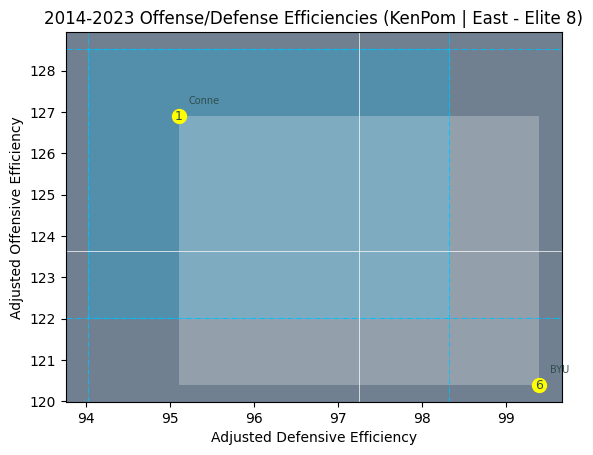

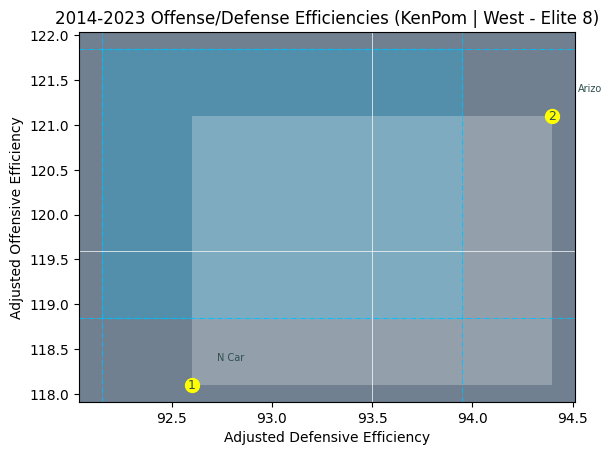

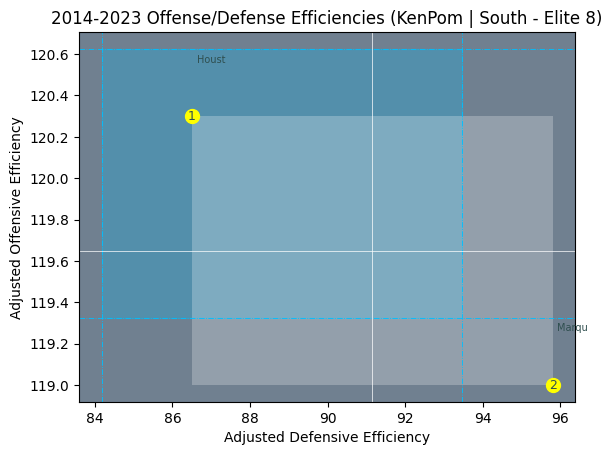

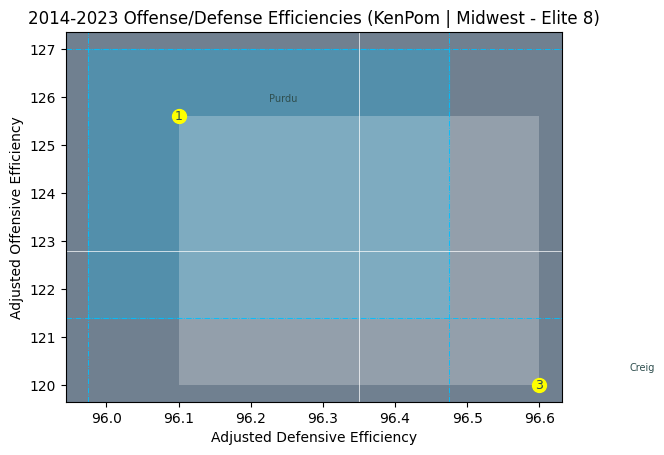

None

None

None

None

In [68]:
eastKpPlotRnd4 = renderPlot(df=trnyKp24EastRnd4, rnd=4, rndTitle="KenPom | East - Elite 8", ptLabels=True)
westKpPlotRnd4 = renderPlot(df=trnyKp24WestRnd4, rnd=4, rndTitle="KenPom | West - Elite 8", ptLabels=True)
southKpPlotRnd4 = renderPlot(df=trnyKp24SouthRnd4, rnd=4, rndTitle="KenPom | South - Elite 8", ptLabels=True)
midwestKpPlotRnd4 = renderPlot(df=trnyKp24MidwestRnd4, rnd=4, rndTitle="KenPom | Midwest - Elite 8", ptLabels=True)

display(eastKpPlotRnd4, westKpPlotRnd4, southKpPlotRnd4, midwestKpPlotRnd4)

In [73]:
# East: Connecticut
# West: Arizona
# South: Houston
# Midwest: Purdue

rnd5Teams = (
    "Connecticut",
    "Arizona",
    "Houston",
    "Purdue",
)

trnyKp24Rnd5 = trnyKp24[trnyKp24["team"].isin(rnd5Teams)]

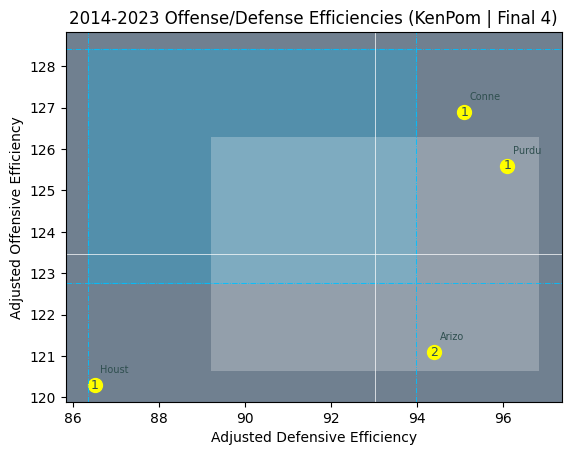

None

In [74]:
kpPlotRnd5 = renderPlot(df=trnyKp24Rnd5, rnd=5, rndTitle="KenPom | Final 4", ptLabels=True)

display(kpPlotRnd5)

In [75]:
# East: Connecticut
# Midwest: Purdue

rnd6Teams = (
    "Connecticut",
    "Purdue",
)

trnyKp24Rnd6 = trnyKp24[trnyKp24["team"].isin(rnd6Teams)]

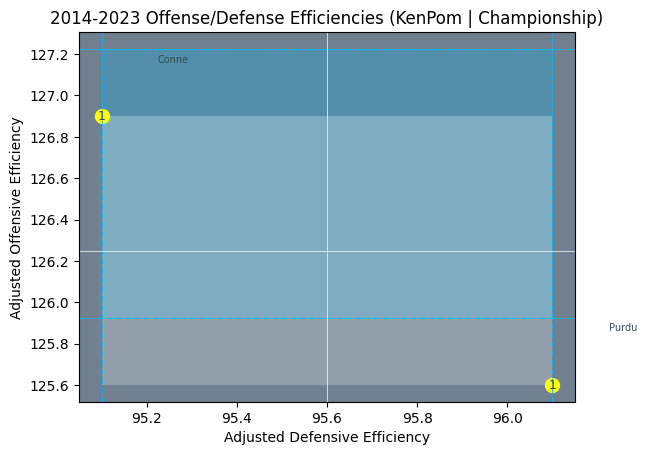

None

In [76]:
kpPlotRnd6 = renderPlot(df=trnyKp24Rnd6, rnd=6, rndTitle="KenPom | Championship", ptLabels=True)

display(kpPlotRnd6)